# 8. Slicing, indexing images

Sometimes we need to focus on a smaller part of an image, extract a specific plane or a specific series of pixels. All those operations are made very simple through Numpy. Let's first import packages:

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt

And load again the image seen previously of 

In [11]:
#image = skimage.io.imread('https://cildata.crbs.ucsd.edu/media/images/48101/48101.tif')
image = skimage.io.imread('https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif')

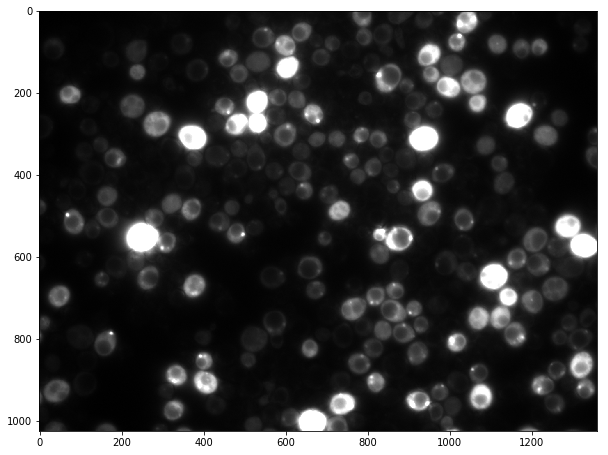

In [20]:
plt.subplots(figsize = (10,10))
plt.imshow(image, cmap = 'gray')
plt.show()

## 8.1 Slicing

### Cropping

To crop an image, one can just specific the range of pixels that should be considered. We have seen before that one can select a specific pixel:

In [15]:
image[550,210]

2462

To select an area one simple gives a range using a semi-column:

In [25]:
cropped = image[700:800,800:900]

In [26]:
cropped.shape

(100, 100)

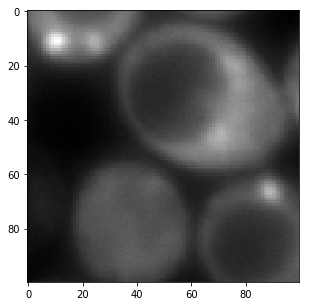

In [28]:
plt.subplots(figsize = (5,5))
plt.imshow(cropped, cmap = 'gray')
plt.show()

### All pixels in a given dimension

If we want to make a vertical cut through the image, i.e. take all rows but only part of the columns, we don't have to explicitly give the rows limits, we can just leave a semi-column:

In [31]:
image.shape

(1024, 1360)

In [29]:
cropped = image[:,800:900]

In [30]:
cropped.shape

(1024, 100)

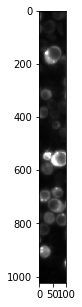

In [32]:
plt.subplots(figsize = (5,5))
plt.imshow(cropped, cmap = 'gray')
plt.show()

### Using a step size

Finally we are not forced to take all the pixels between two limits. We can also say that we take e.g. every third pixel:

In [36]:
cropped = image[700:800:3,800:900:3]

In [37]:
cropped.shape

(34, 34)

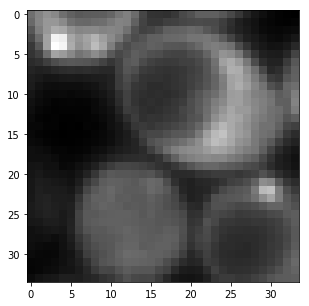

In [38]:
plt.subplots(figsize = (5,5))
plt.imshow(cropped, cmap = 'gray')
plt.show()

### Multi-dimensional image

Often in biology, datasets are multi-dimensional: several wavelength were acquired, imaging was done in 3D or as a time-lapse etc. Also these different dimensions are often saved within one single file as a series of 2D images. Let's look at such an image:

In [2]:
multiD_image = skimage.io.imread('https://cildata.crbs.ucsd.edu/media/images/48102/48102.tif')

The shape of that image is:

In [3]:
multiD_image.shape

(1521, 1133, 3)

And if we plot it:

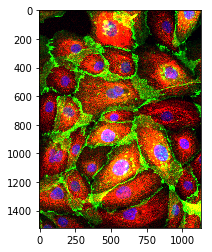

In [4]:
plt.imshow(multiD_image)
plt.show()

So we have an image of 1511x1133 pixels and three channels. As such a three channel image is usually a RedGreenBlue (RGB) image, ```imshow()``` handles it like that by default.

What if we only want to look at the blue channel, which contains the cell nuclei ? We can use again **slicing** to do that. But instead of cropping a part of a 2D image, we select one of the three planes: we take all rows (:) all columns (:) of the third channel (2):

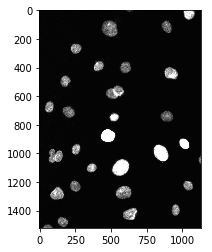

In [5]:
blue_image = multiD_image[:,:,2]
plt.imshow(blue_image, cmap = 'gray')
plt.show()

## 8.2 Indexing

There are many different ways to do array indexing, which means recovering series of specific parts of an array. We will focus on two: indexing with an other array, and indexing with position vectors.

### Indexing with an array

We have seen before that we can generate boolean arrays by doing a logical operation e.g. asking which pixels have a value above some values. Let's first explore what values the pixels in our cropped image have:

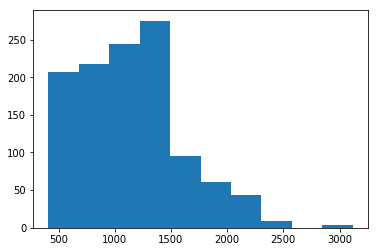

In [40]:
plt.hist(np.ravel(cropped))
plt.show()

We can now create a boolean array telling us which pixels are e.g. above 1500. This is usually called a **mask**.

In [41]:
mymask = cropped > 1500

In [42]:
mymask

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

We can plot that image. Matplotlib just interprets it as a binary image:

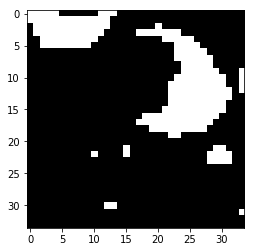

In [43]:
plt.imshow(mymask, cmap = 'gray')
plt.show()

All white pixesl (True) represent regions that are above the threshold. What if we now want to recover the actual pixel values of those pixesl in the "real" image? Instead of looking up values using ```cropped[xpix, ypix]``` we can pass the **entire** boolean array to the image:

In [44]:
cropped[mymask]

array([1593, 1804, 1945, 1849, 1585, 1661, 1765, 1558, 1523, 1819, 2011,
       2011, 1874, 1603, 1514, 1509, 1556, 1577, 1711, 1800, 1765, 1747,
       2018, 2232, 2177, 1937, 1821, 1852, 1863, 1804, 1837, 1816, 1610,
       1524, 1559, 2129, 2985, 2919, 2181, 2006, 2151, 2323, 2088, 1884,
       1705, 1517, 1538, 1547, 1643, 1646, 1673, 1578, 2128, 3118, 3006,
       2231, 1948, 2102, 2401, 2167, 1750, 1536, 1693, 1747, 1692, 1603,
       1577, 2155, 2050, 1849, 1633, 1724, 1893, 1737, 1746, 1970, 1911,
       1696, 1624, 2103, 2224, 2049, 1688, 1562, 1946, 2263, 2239, 1897,
       1587, 1757, 2130, 2191, 2002, 1728, 1732, 2116, 2245, 2080, 1838,
       1630, 1584, 1580, 1795, 2064, 2097, 1953, 1782, 1728, 1601, 1746,
       1538, 1734, 1861, 2087, 2102, 1961, 1841, 1763, 1649, 1807, 1572,
       1810, 1990, 2168, 2042, 2036, 1866, 1746, 1621, 1556, 1731, 1601,
       1916, 2095, 2199, 2151, 1965, 1810, 1695, 1601, 1512, 1790, 2147,
       2343, 2202, 2065, 1928, 1763, 1618, 1609, 16

Of course **this only works if the two arrays have the same size**.

### Indexing with vectors

Sometimes, we need to know the location of objects in an image. For example we might want to know the positions of all pixels in the mask that we created above. We can recover that information using:

In [47]:
mypositions = np.argwhere(mymask == True)

In [48]:
mypositions

array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       [ 0,  3],
       [ 0,  4],
       [ 0, 11],
       [ 0, 12],
       [ 0, 13],
       [ 1,  0],
       [ 1,  1],
       [ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 1, 11],
       [ 1, 12],
       [ 2,  1],
       [ 2,  2],
       [ 2,  3],
       [ 2,  4],
       [ 2,  5],
       [ 2,  6],
       [ 2,  7],
       [ 2,  8],
       [ 2,  9],
       [ 2, 10],
       [ 2, 11],
       [ 2, 12],
       [ 2, 20],
       [ 3,  1],
       [ 3,  2],
       [ 3,  3],
       [ 3,  4],
       [ 3,  5],
       [ 3,  6],
       [ 3,  7],
       [ 3,  8],
       [ 3,  9],
       [ 3, 10],
       [ 3, 11],
       [ 3, 17],
       [ 3, 18],
       [ 3, 19],
       [ 3, 20],
       [ 3, 21],
       [ 3, 22],
       [ 3, 23],
       [ 4,  2],
       [ 4,  3],
       [ 4,  4],
       [ 4,  5],
       [ 4,  6],
       [ 4,  7],
       [ 4,  8

This command basically ask to return the position ("arg" like in mathematics) of pixels that fulfill some condition. Notice that we used here the ```==``` "is equal" sign just like we used it for a variable. Numpy once again knows that it has to do the comparison for all pixes. 

The returned positions are in a form of a 2D list:

In [49]:
mypositions.shape

(211, 2)

We have **211** pixels and each of them has **2** coordinates, row and column. We can now recover a single pixel, e.g. the 8th pixel:

In [50]:
mypositions[8, :]

array([1, 0])

which is at row = 1 and column = 0. We can use those coordinates to recover the value in the original image:

In [52]:
cropped[mypositions[8,0], mypositions[8,1]]

1523

We can also pass the entire rows and columns coordinate lists and recover in one shot all those pixels. All the rows are recovered using:

In [53]:
mypositions[:, 0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,
        7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 19, 19, 21, 21, 21, 22, 22, 22, 22, 22, 22,
       23, 23, 23, 23, 30, 30, 31])

and the columns:

In [54]:
mypositions[:, 1]

array([ 0,  1,  2,  3,  4, 11, 12, 13,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 20,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 17, 18, 19, 20, 21, 22,
       23,  2,  3,  4,  5,  6,  7,  8,  9, 10, 21, 22, 23, 24, 25,  2,  3,
        4,  5,  6,  7,  8,  9, 23, 24, 25, 26, 23, 24, 25, 26, 27, 23, 24,
       25, 26, 27, 28, 24, 25, 26, 27, 28, 24, 25, 26, 27, 28, 29, 33, 23,
       24, 25, 26, 27, 28, 29, 30, 33, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       33, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 22, 23, 24, 25, 26, 27, 28, 29, 30, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 22, 23, 15, 29, 30, 10, 15, 28, 29, 30, 31,
       28, 29, 30, 31, 12, 13, 33])

We pass those two list to the original image:

In [56]:
cropped[mypositions[:, 0],mypositions[:, 1]]

array([1593, 1804, 1945, 1849, 1585, 1661, 1765, 1558, 1523, 1819, 2011,
       2011, 1874, 1603, 1514, 1509, 1556, 1577, 1711, 1800, 1765, 1747,
       2018, 2232, 2177, 1937, 1821, 1852, 1863, 1804, 1837, 1816, 1610,
       1524, 1559, 2129, 2985, 2919, 2181, 2006, 2151, 2323, 2088, 1884,
       1705, 1517, 1538, 1547, 1643, 1646, 1673, 1578, 2128, 3118, 3006,
       2231, 1948, 2102, 2401, 2167, 1750, 1536, 1693, 1747, 1692, 1603,
       1577, 2155, 2050, 1849, 1633, 1724, 1893, 1737, 1746, 1970, 1911,
       1696, 1624, 2103, 2224, 2049, 1688, 1562, 1946, 2263, 2239, 1897,
       1587, 1757, 2130, 2191, 2002, 1728, 1732, 2116, 2245, 2080, 1838,
       1630, 1584, 1580, 1795, 2064, 2097, 1953, 1782, 1728, 1601, 1746,
       1538, 1734, 1861, 2087, 2102, 1961, 1841, 1763, 1649, 1807, 1572,
       1810, 1990, 2168, 2042, 2036, 1866, 1746, 1621, 1556, 1731, 1601,
       1916, 2095, 2199, 2151, 1965, 1810, 1695, 1601, 1512, 1790, 2147,
       2343, 2202, 2065, 1928, 1763, 1618, 1609, 16